In [1]:
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
df = fetch_california_housing()
df.data, df.target

(array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]))

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [6]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(x_train_scaled, y_train)

LinearRegression()

In [7]:
regression.coef_

array([ 0.81675002,  0.11871966, -0.25589289,  0.30302387, -0.0051399 ,
       -0.0401272 , -0.90469791, -0.8777167 ])

In [8]:
y_pred_linear = regression.predict(x_test_scaled)
y_pred_linear, y_test

(array([2.29679818, 4.54784263, 1.50061601, ..., 1.07286843, 1.37191967,
        2.57084675]),
 array([2.875  , 5.00001, 0.963  , ..., 0.819  , 0.776  , 3.908  ]))

In [9]:
from sklearn.linear_model import Ridge

# Гребнева регресія
regression_ridge = Ridge()

In [10]:
from sklearn.linear_model import Lasso


regression_lasso = Lasso(alpha=0.01)

In [11]:
from sklearn.linear_model import PoissonRegressor

regression_poisson = PoissonRegressor()

In [12]:
models = {
    "Linear regression": regression,
    "Ridge regression": regression_ridge,
    "Lasso regression": regression_lasso,
    "Poisson regression": regression_poisson
}

models_results = {
    "Linear regression": [],
    "Ridge regression": [],
    "Lasso regression": [],
    "Poisson regression": []
}

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

for model_name, model in models.items():    
    for n in [2, 4, 8]:
        x_train_sub = x_train_scaled[:, :n]
        x_test_sub = x_test_scaled[:, :n]

        model.fit(x_train_sub, y_train)
        print(f"{model_name} coef. with {n} features: {model.coef_}")
        
        y_pred = model.predict(x_test_sub)
        temp = [mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
        models_results[model_name].append([f"{value}" for value in temp])
    print()

Linear regression coef. with 2 features: [0.81673584 0.21954986]
Linear regression coef. with 4 features: [ 1.00515869  0.20051949 -0.52717787  0.47957821]
Linear regression coef. with 8 features: [ 0.81675002  0.11871966 -0.25589289  0.30302387 -0.0051399  -0.0401272
 -0.90469791 -0.8777167 ]

Ridge regression coef. with 2 features: [0.81668396 0.21953019]
Ridge regression coef. with 4 features: [ 1.0048689   0.20052098 -0.52654725  0.47898849]
Ridge regression coef. with 8 features: [ 0.81671796  0.11880071 -0.25572197  0.30279923 -0.00511365 -0.04013182
 -0.90392262 -0.87693423]

Lasso regression coef. with 2 features: [0.80533355 0.20814764]
Lasso regression coef. with 4 features: [ 0.93005805  0.19496586 -0.3502684   0.3121861 ]
Lasso regression coef. with 8 features: [ 0.76201529  0.12492409 -0.10625355  0.15302354 -0.         -0.03001241
 -0.80301898 -0.76872117]

Poisson regression coef. with 2 features: [0.22540478 0.05558203]
Poisson regression coef. with 4 features: [ 0.2227

In [14]:
models_results

{'Linear regression': [['0.6449205915369245', '0.5222056670182316'],
  ['0.5959634409470073', '0.5584759449683476'],
  ['0.5118924392035067', '0.6207605870285711']],
 'Ridge regression': [['0.6449204169934943', '0.5222057963300613'],
  ['0.5959842100949632', '0.5584605579868736'],
  ['0.5118982769325282', '0.620756262102556']],
 'Lasso regression': [['0.6451411699019397', '0.5220422498562342'],
  ['0.6056254661099806', '0.5513177600249977'],
  ['0.5216041304602475', '0.6135656065813175']],
 'Poisson regression': [['0.7738887269237753', '0.42665864149030686'],
  ['0.7755538217209962', '0.4254250433257738'],
  ['0.7342393909269244', '0.4560331540960201']]}

In [15]:
import pandas as pd

table1_data = {
    'Model': list(models_results.keys()),
    '2 features': [float(result[0][0]) for result in models_results.values()],
    '4 features': [float(result[1][0]) for result in models_results.values()],
    '8 features': [float(result[2][0]) for result in models_results.values()],
}

table1 = pd.DataFrame(table1_data)
table1.set_index('Model', inplace=True)

table2_data = {
    'Model': list(models_results.keys()),
    '2 features': [result[0][1] for result in models_results.values()],
    '4 features': [result[1][1] for result in models_results.values()],
    '8 features': [result[2][1] for result in models_results.values()],
}

table2 = pd.DataFrame(table2_data)
table2.set_index('Model', inplace=True)

In [16]:
table1

,2 features,4 features,8 features
Model,,,
Linear regression,0.644921,0.595963,0.511892
Ridge regression,0.644920,0.595984,0.511898
Lasso regression,0.645141,0.605625,0.521604
Poisson regression,0.773889,0.775554,0.734239


In [17]:
table2

,2 features,4 features,8 features
Model,,,
Linear regression,0.5222056670182316,0.5584759449683476,0.6207605870285711
Ridge regression,0.5222057963300613,0.5584605579868736,0.620756262102556
Lasso regression,0.5220422498562342,0.5513177600249977,0.6135656065813175
Poisson regression,0.42665864149030686,0.4254250433257738,0.4560331540960201


In [18]:
table1['Mean'] = table1.mean(axis=1)

table1

,2 features,4 features,8 features,Mean
Model,,,,
Linear regression,0.644921,0.595963,0.511892,0.584259
Ridge regression,0.644920,0.595984,0.511898,0.584268
Lasso regression,0.645141,0.605625,0.521604,0.590790
Poisson regression,0.773889,0.775554,0.734239,0.761227


In [19]:
regression.fit(x_train_scaled, y_train)

y_pred = regression.predict(x_test_scaled)
y_train, y_pred

(array([1.205, 1.523, 1.386, ..., 3.615, 1.438, 4.345]),
 array([2.29679818, 4.54784263, 1.50061601, ..., 1.07286843, 1.37191967,
        2.57084675]))

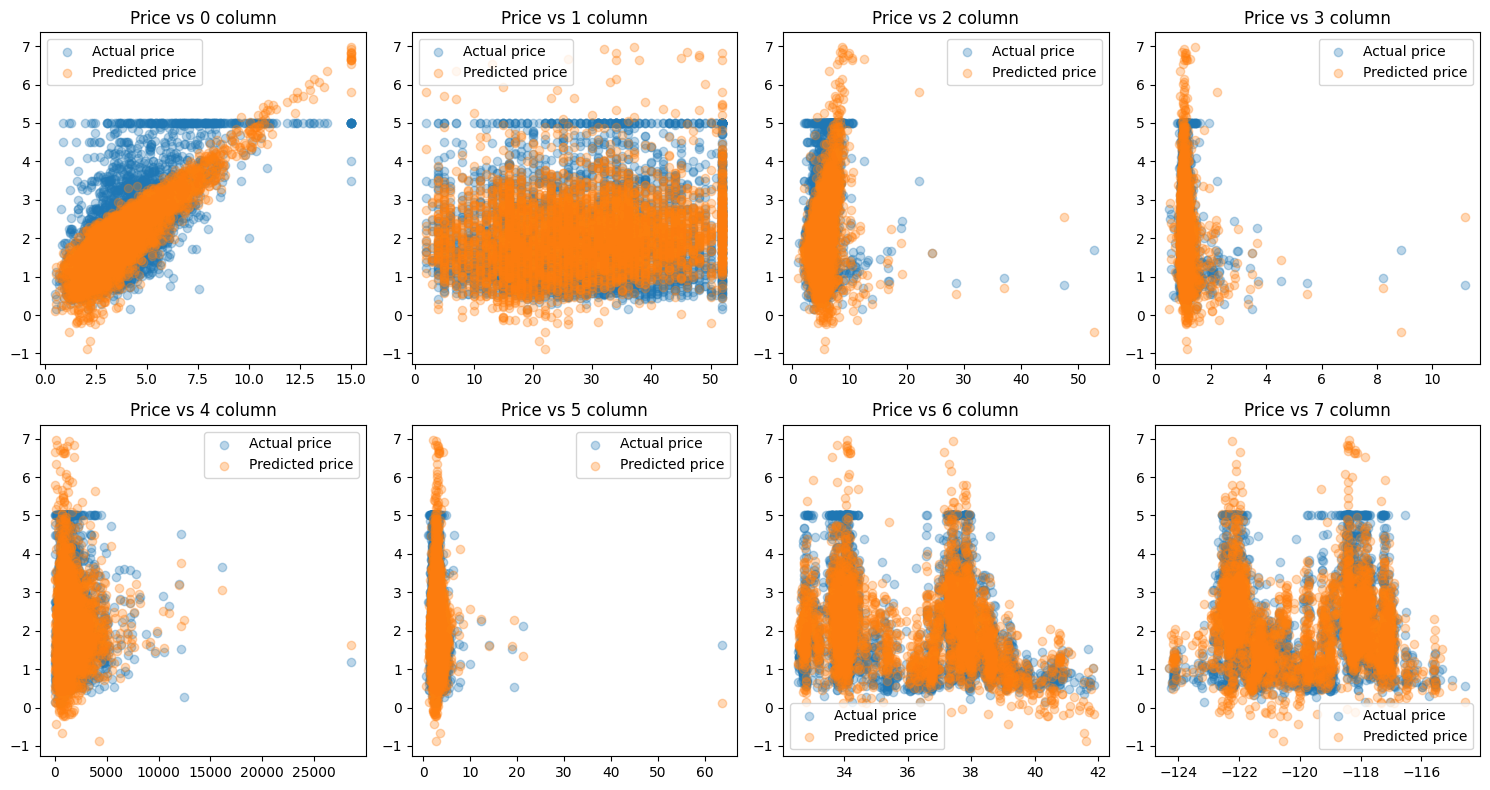

In [24]:
import matplotlib.pyplot as plt

num_columns = df.data.shape[1]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axes = axes.flatten()

for column_index, ax in enumerate(axes):
    ax.scatter(x_test[:, column_index], y_test, alpha=0.3, label='Actual price')
    ax.scatter(x_test[:, column_index], y_pred, alpha=0.3, label='Predicted price')

    ax.set_title(f"Price vs {column_index} column")
    ax.legend()

plt.tight_layout()
plt.show()